### Importing the required libraries

In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

### Exploring the data

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
feature_data = pd.DataFrame(columns= iris.feature_names, data = iris.data)
feature_data['target'] = iris.target
feature_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
x = feature_data.iloc[:, : -1]
y = feature_data['target']

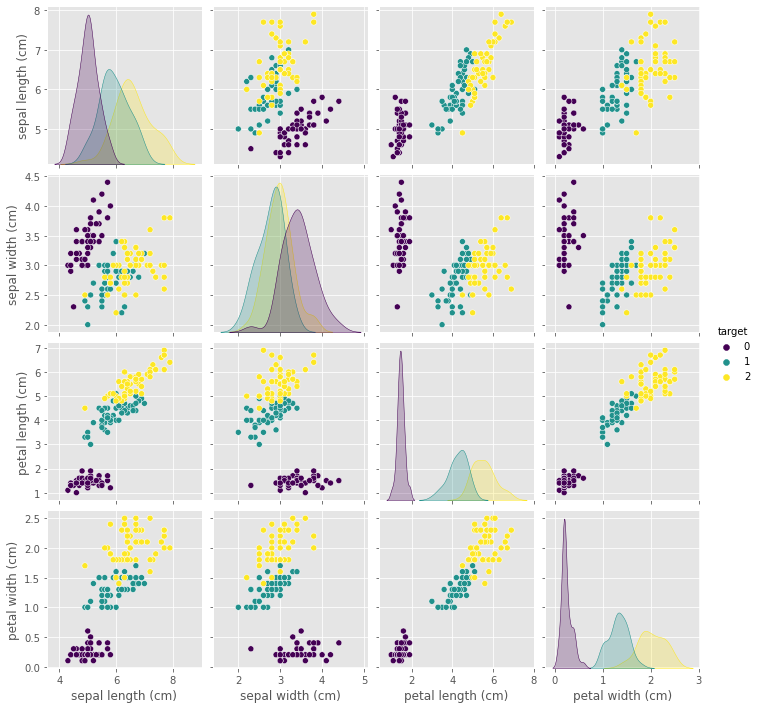

In [6]:
sns.pairplot(data = feature_data, hue = 'target', palette = 'viridis')

### Preprocessing the data for our model

The data set was pre-cleaned and ready for use. So, we don't need to further preprocess it. We will just split the data into train and test set and perform our classification using these splits.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 69, test_size = 0.2)

Now lets compare the results of classification using Linear Regression and k-Nearest Neighbors. 

### Linear Regression

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
pred = np.round(model.predict(x_test)).astype(np.int8)
pred

array([0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 0, 2, 2, 1, 0], dtype=int8)

In [10]:
model.score(x_test, y_test)

0.9394719311819666

### k-Nearest Neighbours

In [11]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [12]:
pred = np.round(knn.predict(x_test)).astype(np.int8)
pred

array([0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 0, 2, 2, 1, 0], dtype=int8)

In [13]:
knn.score(x_test, y_test)

0.9666666666666667

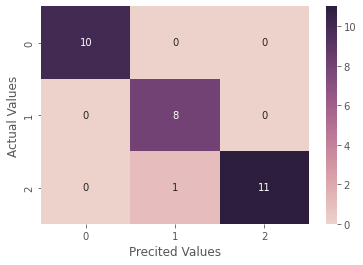

In [14]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, pred), cmap = sns.cubehelix_palette(as_cmap=True), annot = True)
plt.ylabel('Actual Values')
plt.xlabel('Precited Values')
plt.show()

We can see that the k-Nearest Neighbor model outperforms Linear Regression model unsurprisingly.